# Laboratorio 2: Armado de un esquema de aprendizaje automático

En el laboratorio final se espera que puedan poner en práctica los conocimientos adquiridos en el curso, trabajando con un conjunto de datos de clasificación.

El objetivo es que se introduzcan en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

El conjunto de datos a utilizar está en `./data/loan_data.csv`. Si abren el archivo verán que al principio (las líneas que empiezan con `#`) describen el conjunto de datos y sus atributos (incluyendo el atributo de etiqueta o clase).

Se espera que hagan uso de las herramientas vistas en el curso. Se espera que hagan uso especialmente de las herramientas brindadas por `scikit-learn`.

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from ml.visualization import plot_confusion_matrix, classifier_boundary
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, classification_report
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import linear_model,tree
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
np.random.seed(0)  # Para mayor determinismo




## Carga de datos y división en entrenamiento y evaluación

La celda siguiente se encarga de la carga de datos (haciendo uso de pandas). Estos serán los que se trabajarán en el resto del laboratorio.

In [86]:
dataset = pd.read_csv("./data/loan_data.csv", comment="#")

# División entre instancias y etiquetas
X, y = dataset.iloc[:, 1:], dataset.TARGET

# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [87]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1854 entries, 0 to 1853
Data columns (total 11 columns):
TARGET     1854 non-null int64
LOAN       1854 non-null int64
MORTDUE    1854 non-null float64
VALUE      1854 non-null float64
YOJ        1854 non-null float64
DEROG      1854 non-null float64
DELINQ     1854 non-null float64
CLAGE      1854 non-null float64
NINQ       1854 non-null float64
CLNO       1854 non-null float64
DEBTINC    1854 non-null float64
dtypes: float64(9), int64(2)
memory usage: 159.4 KB


In [88]:
dataset

,TARGET,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,0,4700,88026.0,115506.0,6.0,0.0,0.0,182.248332,0.0,27.0,29.209023
1,0,19300,39926.0,101208.0,4.0,0.0,0.0,140.051638,0.0,14.0,31.545694
2,0,5700,71556.0,79538.0,2.0,0.0,0.0,92.643085,0.0,15.0,41.210012
3,0,13000,44875.0,57713.0,0.0,1.0,0.0,184.990324,1.0,12.0,28.602076
4,0,19300,72752.0,106084.0,11.0,0.0,0.0,193.707100,1.0,13.0,30.686106
5,0,11500,53651.0,87547.0,18.0,0.0,0.0,191.396887,0.0,16.0,34.368651
6,0,17200,103519.0,118074.0,0.0,0.0,0.0,102.678612,1.0,21.0,41.418353
7,0,24200,22763.0,47622.0,23.0,0.0,0.0,126.922691,1.0,10.0,23.040945
8,0,12600,62493.0,77141.0,13.0,0.0,0.0,266.333101,0.0,26.0,27.007872
9,0,12300,90006.0,121122.0,9.0,0.0,0.0,133.497541,1.0,21.0,36.910482



Documentación:

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Ejercicio 1: Descripción de los Datos y la Tarea

Responder las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponible para hacer la predicción?
4. ¿Qué atributos imagina ud. que son los más determinantes para la predicción?



### RESPUESTA 

- El conjunto de datos contiene información de 1854 préstamos realizados a personas sobre el valor neto de una vivienda. La idea es usar dicho conjunto para ayudar en la toma decisiones futuras relacionadas con aceptar o denegar las solicitudes a estos préstamos.

- La variable a predecir (target) es una variable binaria donde la etiqueta 1 representa a un cliente que no ha pagado su préstamo y la 0 a aquel que si lo ha hecho.

- Para hacer la predicción contamos con las siguientes variables:

**LOAN** : Cantidad de préstamo requerido.

**MORTDUE**: Cantidad adeudada en la hipoteca existente.

**VALUE**: Valor de la propiedad actual. 

**YOJ**: Cantidad de años en el trabajo actual.

**DEROG**: Número de informes despectivos importantes.

**DELINQ**: Número de líneas de crédito morosas.

**CLAGE**: Edad de la línea más antigua en meses.

**NINQ**: Número de líneas de crédito recientes.    

**CLNO**: Número de líneas de crédito.

**DEBTINC** : Relación deuda-ingreso.

- Dado el problema que queremos resolver las variables LOAN y MORTDUE podrían tener una influencia importante en la predicción pues están directamente relacionadas con el perfil del cliente que solicita el préstamo, seguidas por DELINQ y DEBTINC con quizás una menor influencia. 

## Ejercicio 2: Predicción con Modelos Lineales

En este ejercicio se entrenarán modelos lineales de clasificación para predecir la variable objetivo.

Para ello, deberán utilizar la clase SGDClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/sgd.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html


### Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador SGDClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

In [89]:
np.random.seed(1234)
clf = linear_model.SGDClassifier(random_state=5)
clf.fit(X_train, y_train)

/home/jfrau/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=5, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

Reporte de clasificación  (sobre conjunto de evaluación):

              precision    recall  f1-score   support

           0       0.84      1.00      0.92       313
           1       0.00      0.00      0.00        58

   micro avg       0.84      0.84      0.84       371
   macro avg       0.42      0.50      0.46       371
weighted avg       0.71      0.84      0.77       371



Accuracy: 0.8437


/home/jfrau/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


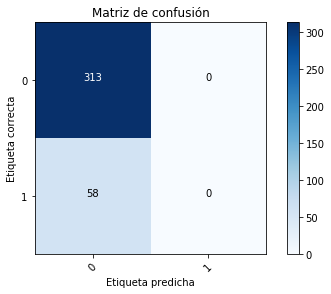

In [90]:
print("Reporte de clasificación  (sobre conjunto de evaluación):", end="\n\n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred), end="\n\n")

print("================================================", end="\n\n")
print("Accuracy: %0.4f" % accuracy_score(y_true, y_pred))

plot_confusion_matrix(confusion_matrix(y_true, y_pred),
                      classes=('0','1'), title="Matriz de confusión")


#cnf_matrix = confusion_matrix(y_true, y_pred)
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes=('0', '1'), title="Matriz de confusión")

Se observa que usando los valores por default de SGDClassifier, la predicción sobre la clase 0 es muy buena sin embargo no sobre la clase 1 es nula, con lo cual la predicción realizada no es para nada buena. 

### Ejercicio 2.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del SGDClassifier. Como mínimo, probar diferentes funciones de loss, tasas de entrenamiento y tasas de regularización.

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

/home/jfrau/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# Exploración de hiperparámetros para función de coste "hinge"

Mejor conjunto de parámetros:
{'alpha': 0.1, 'eta0': 0.01, 'l1_ratio': 0.3, 'learning_rate': 'adaptive', 'n_iter_no_change': 20, 'n_jobs': -1, 'penalty': 'elasticnet'}

Puntajes de la grilla:

Exactitud: 0.828 (+/-0.000) para los parámetros {'alpha': 0.1, 'eta0': 0.1, 'l1_ratio': 0.15, 'learning_rate': 'constant', 'n_iter_no_change': 5, 'n_jobs': -1, 'penalty': 'l1'}
Exactitud: 0.697 (+/-0.069) para los parámetros {'alpha': 0.1, 'eta0': 0.1, 'l1_ratio': 0.15, 'learning_rate': 'constant', 'n_iter_no_change': 5, 'n_jobs': -1, 'penalty': 'l2'}
Exactitud: 0.829 (+/-0.000) para los parámetros {'alpha': 0.1, 'eta0': 0.1, 'l1_ratio': 0.15, 'learning_rate': 'constant', 'n_iter_no_change': 5, 'n_jobs': -1, 'penalty': 'elasticnet'}
Exactitud: 0.829 (+/-0.000) para los parámetros {'alpha': 0.1, 'eta0': 0.1, 'l1_ratio': 0.15, 'learning_rate': 'constant', 'n_iter_no_change': 10, 'n_jobs': -1, 'penalty': 'l1'}
Exactitud: 0.703 (+/-0.065

/home/jfrau/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# Exploración de hiperparámetros para función de coste "log"

Mejor conjunto de parámetros:
{'alpha': 0.1, 'eta0': 0.001, 'l1_ratio': 0.4, 'learning_rate': 'optimal', 'n_iter_no_change': 15, 'n_jobs': -1, 'penalty': 'l1'}

Puntajes de la grilla:

Exactitud: 0.604 (+/-0.080) para los parámetros {'alpha': 0.1, 'eta0': 0.1, 'l1_ratio': 0.15, 'learning_rate': 'constant', 'n_iter_no_change': 5, 'n_jobs': -1, 'penalty': 'l1'}
Exactitud: 0.818 (+/-0.001) para los parámetros {'alpha': 0.1, 'eta0': 0.1, 'l1_ratio': 0.15, 'learning_rate': 'constant', 'n_iter_no_change': 5, 'n_jobs': -1, 'penalty': 'l2'}
Exactitud: 0.831 (+/-0.000) para los parámetros {'alpha': 0.1, 'eta0': 0.1, 'l1_ratio': 0.15, 'learning_rate': 'constant', 'n_iter_no_change': 5, 'n_jobs': -1, 'penalty': 'elasticnet'}
Exactitud: 0.699 (+/-0.070) para los parámetros {'alpha': 0.1, 'eta0': 0.1, 'l1_ratio': 0.15, 'learning_rate': 'constant', 'n_iter_no_change': 10, 'n_jobs': -1, 'penalty': 'l1'}
Exactitud: 0.702 (+/-0.065) para los

/home/jfrau/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/jfrau/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Exploración de hiperparámetros para función de coste "perceptron"

Mejor conjunto de parámetros:
{'alpha': 0.1, 'eta0': 0.01, 'l1_ratio': 0.4, 'learning_rate': 'optimal', 'n_iter_no_change': 15, 'n_jobs': -1, 'penalty': 'l1'}

Puntajes de la grilla:

Exactitud: 0.829 (+/-0.000) para los parámetros {'alpha': 0.1, 'eta0': 0.1, 'l1_ratio': 0.15, 'learning_rate': 'constant', 'n_iter_no_change': 5, 'n_jobs': -1, 'penalty': 'l1'}
Exactitud: 0.830 (+/-0.000) para los parámetros {'alpha': 0.1, 'eta0': 0.1, 'l1_ratio': 0.15, 'learning_rate': 'constant', 'n_iter_no_change': 5, 'n_jobs': -1, 'penalty': 'l2'}
Exactitud: 0.687 (+/-0.067) para los parámetros {'alpha': 0.1, 'eta0': 0.1, 'l1_ratio': 0.15, 'learning_rate': 'constant', 'n_iter_no_change': 5, 'n_jobs': -1, 'penalty': 'elasticnet'}
Exactitud: 0.828 (+/-0.000) para los parámetros {'alpha': 0.1, 'eta0': 0.1, 'l1_ratio': 0.15, 'learning_rate': 'constant', 'n_iter_no_change': 10, 'n_jobs': -1, 'penalty': 'l1'}
Exactitud: 0.825 (+/-0.000) pa

/home/jfrau/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# Exploración de hiperparámetros para función de coste "modified_huber"

Mejor conjunto de parámetros:
{'alpha': 0.001, 'eta0': 0.001, 'l1_ratio': 0.15, 'learning_rate': 'adaptive', 'n_iter_no_change': 5, 'n_jobs': -1, 'penalty': 'l2'}

Puntajes de la grilla:

Exactitud: 0.696 (+/-0.069) para los parámetros {'alpha': 0.1, 'eta0': 0.1, 'l1_ratio': 0.15, 'learning_rate': 'constant', 'n_iter_no_change': 5, 'n_jobs': -1, 'penalty': 'l1'}
Exactitud: 0.830 (+/-0.000) para los parámetros {'alpha': 0.1, 'eta0': 0.1, 'l1_ratio': 0.15, 'learning_rate': 'constant', 'n_iter_no_change': 5, 'n_jobs': -1, 'penalty': 'l2'}
Exactitud: 0.831 (+/-0.000) para los parámetros {'alpha': 0.1, 'eta0': 0.1, 'l1_ratio': 0.15, 'learning_rate': 'constant', 'n_iter_no_change': 5, 'n_jobs': -1, 'penalty': 'elasticnet'}
Exactitud: 0.790 (+/-0.006) para los parámetros {'alpha': 0.1, 'eta0': 0.1, 'l1_ratio': 0.15, 'learning_rate': 'constant', 'n_iter_no_change': 10, 'n_jobs': -1, 'penalty': 'l1'}
Exactitud: 0.413 (+/-0

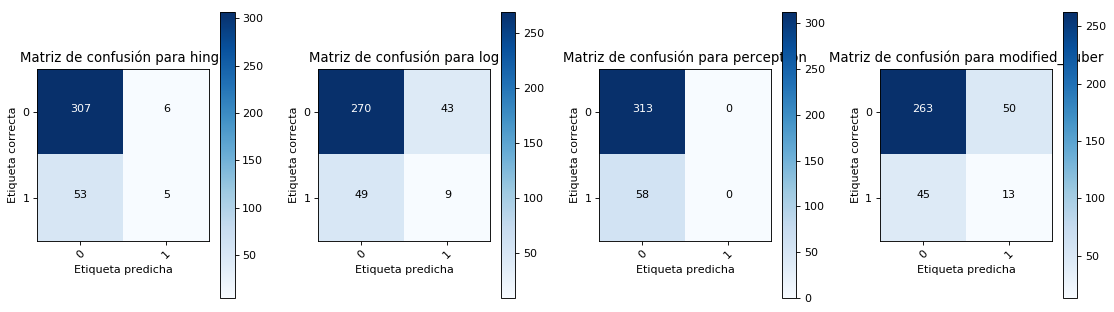

In [91]:
plt.figure(figsize=(14, 4), dpi= 80, facecolor='w', edgecolor='k')

for idx, loss in enumerate(('hinge', 'log', 'perceptron','modified_huber'), start=1):
    exploring_params = {
        'learning_rate': ['constant','optimal','invscaling','adaptive'],
        'eta0': [0.1, 0.01, 0.001],  # Tasa de entrenamiento
        'alpha': [0.1, 0.01, 0.001],  # Tasa de regularización
        'penalty' : [ 'l1','l2', 'elasticnet'],
        'n_iter_no_change': [5,10,15,20],
        'l1_ratio':[0.15,0.30, 0.40],
        'n_jobs' :[-1]
        
    }
    m = SGDClassifier(loss=loss, tol=1e-3)
    model = GridSearchCV(m, exploring_params, cv=5, scoring='accuracy')
    model.fit(X_train, y_train)
    
    print("# Exploración de hiperparámetros para función de coste \"%s\"" % loss, end="\n\n")
    
    print("Mejor conjunto de parámetros:")
    print(model.best_params_, end="\n\n")

    print("Puntajes de la grilla:", end="\n\n")
    means = model.cv_results_['mean_test_score']
    stds = model.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, model.cv_results_['params']):
        print("Exactitud: %0.3f (+/-%0.03f) para los parámetros %r" % (mean, std ** 2, params))
    print()

    print("Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):", end="\n\n")
    y_true, y_pred = y_test, model.predict(X_test)
    print(classification_report(y_true, y_pred), end="\n\n")
    
    print("================================================", end="\n\n")

    plt.subplot(1, 4, idx)
    plot_confusion_matrix(confusion_matrix(y_true, y_pred),
                          classes=('0','1'), title="Matriz de confusión para %s" % loss)

### Exploración de hiperparámetros 

**Función hinge**

*Mejor conjunto de parámetros:*

- alpha: 0.1, 
- eta0: 0.01, 
- l1_ratio: 0.3, 
- learning_rate: 'adaptive', 
- n_iter_no_change: 20,
- penalty': 'elasticnet'

**Función log**

*Mejor conjunto de parámetros:*

- alpha: 0.1, 
- eta0: 0.001, 
- l1_ratio: 0.4, 
- learning_rate: 'optimal', 
- n_iter_no_change: 15, 
- penalty: 'l1'

**Función log**

*Mejor conjunto de parámetros:*

- alpha: 0.1, 
- eta0: 0.01, 
- l1_ratio: 0.4, 
- learning_rate: 'optimal', 
- n_iter_no_change: 15, 
- penalty': 'l1'


**Función modified_huber**

*Mejor conjunto de parámetros:*

- alpha: 0.001,
- eta0: 0.001, 
- l1_ratio: 0.15, 
- learning_rate: 'adaptive',
- n_iter_no_change: 5,  
- penalty: 'l2'.

Se observa que la mejor combinación de parámetros varía de una función a la otra. Además, teniendo en cuenta los resultados de las matrices de confusión vemos que las 4 funciones muestran muy buenos resultados en la clasificación de la clase 0, siendo la función modified_huber la que presenta un mejor balance en la clasificación de ambas clases.


## Ejercicio 3: Árbol de Decisión

En este ejercicio se entrenarán árboles de decisión para predecir la variable objetivo.

Para ello, deberán utilizar la clase DecisionTreeClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/tree.html
  - https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

### Ejercicio 3.1: DecisionTreeClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador DecisionTreeClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


In [92]:
clf = tree.DecisionTreeClassifier(random_state= 5)
clf = clf.fit(X_train, y_train)

In [93]:
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred), end="\n\n")

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       313
           1       0.65      0.62      0.64        58

   micro avg       0.89      0.89      0.89       371
   macro avg       0.79      0.78      0.79       371
weighted avg       0.89      0.89      0.89       371




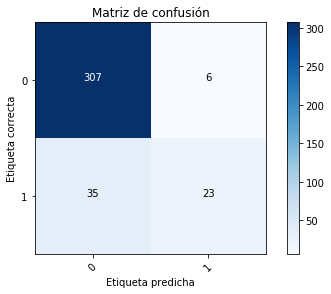

In [96]:
cnf_matrix = confusion_matrix(y_true, y_pred)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=('0', '1'), title="Matriz de confusión")

En comparación con el clasificador lineal con los paramétros por default, el árbol de decisión muestra mejores resultados en la clasificación de la clase 1.

### Ejercicio 3.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del DecisionTreeClassifier. Como mínimo, probar diferentes criterios de partición (criterion), profundidad máxima del árbol (max_depth), y cantidad mínima de samples por hoja (min_samples_leaf).

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

# Exploración de hiperparámetros para el criterio "gini"

Mejor conjunto de parámetros:
{'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2, 'splitter': 'best'}

Puntajes de la grilla:

Exactitud: 0.872 (+/-0.000) para los parámetros {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Exactitud: 0.850 (+/-0.000) para los parámetros {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
Exactitud: 0.872 (+/-0.000) para los parámetros {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'best'}
Exactitud: 0.850 (+/-0.000) para los parámetros {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'random'}
Exactitud: 0.872 (+/-0.000) para los parámetros {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
Exactitud: 0.850 (+/-0.000) para los parámetros {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}
Exac

# Exploración de hiperparámetros para el criterio "entropy"

Mejor conjunto de parámetros:
{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 20, 'splitter': 'best'}

Puntajes de la grilla:

Exactitud: 0.869 (+/-0.000) para los parámetros {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Exactitud: 0.850 (+/-0.000) para los parámetros {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
Exactitud: 0.869 (+/-0.000) para los parámetros {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'best'}
Exactitud: 0.850 (+/-0.000) para los parámetros {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'random'}
Exactitud: 0.869 (+/-0.000) para los parámetros {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
Exactitud: 0.850 (+/-0.000) para los parámetros {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}
E

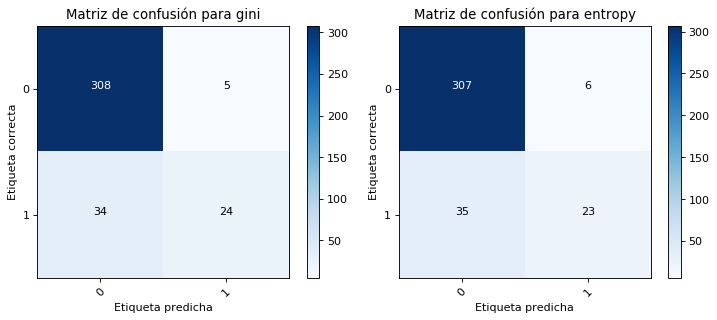

In [95]:
plt.figure(figsize=(14, 4), dpi= 80, facecolor='w', edgecolor='k')

for idx, criterion  in enumerate(('gini', 'entropy'), start=1):
    exploring_params = {
        'max_depth': (2,5,10,15),
        'splitter':['best','random'],
        'min_samples_leaf': (1,3,10,15),
        'min_samples_split': (2,3,5,20)
    }
    
    m = tree.DecisionTreeClassifier(criterion=criterion, random_state=0)
    model = GridSearchCV(m, exploring_params, cv=5, scoring='accuracy')
    model.fit(X_train, y_train)
    
    
    print("# Exploración de hiperparámetros para el criterio \"%s\"" % criterion, end="\n\n")
    
    print("Mejor conjunto de parámetros:")
    print(model.best_params_, end="\n\n")

    print("Puntajes de la grilla:", end="\n\n")
    means = model.cv_results_['mean_test_score']
    stds = model.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, model.cv_results_['params']):
        print("Exactitud: %0.3f (+/-%0.03f) para los parámetros %r" % (mean, std ** 2, params))
    print()

    print("Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):", end="\n\n")
    y_true, y_pred = y_test, model.predict(X_test)
    print(classification_report(y_true, y_pred), end="\n\n")
    
    print("================================================", end="\n\n")

    plt.subplot(1, 3, idx)
    plot_confusion_matrix(confusion_matrix(y_true, y_pred),
                          classes=('0', '1'), title="Matriz de confusión para %s" % criterion)

### Exploración de hiperparámetros 

**Criterio gini**

*Mejor conjunto de parámetros:*

- max_depth: 5, 
- min_samples_leaf: 10, 
- min_samples_split: 2,
- splitter: 'best'

**Criterio entropy**

*Mejor conjunto de parámetros:*

- max_depth: 5, 
- min_samples_leaf: 1, 
- min_samples_split: 20, 
- splitter: 'best'

Se observa que la mejor combinación de paramétros para ambos criterios es similar, diferenciándose en min_samples_leaf y min_samples_split. Esto también se visualiza en los resultados de las matrices de confusión donde los resultados son muy parecidos.